## Data Preprocessing

#### Imports

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set maximum rows and columns to display (None for unlimited)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 0)  # Adjust display width for console-like output
pd.set_option('display.max_colwidth', None)  # Show full content of each column

# Suppress scientific notation
pd.set_option('display.float_format', '{:.2f}'.format)

### Read in Data

In [49]:
comorbidities = pd.read_csv('comorbidities.csv')
diagnosis = pd.read_csv('diagnosis.csv')
labs = pd.read_csv('labs.csv')
treatments = pd.read_csv('treatments.csv')

### Merge Data into a Single Dataset

In [50]:
c_d = pd.merge(diagnosis, comorbidities, on = ['subject_id', 'hadm_id'], how = 'left')   # Merge demographic and comorbidity data
c_d_l = pd.merge(c_d, labs[['subject_id', 'had_ddimer', 'had_o2_sat']], on = 'subject_id', how = 'inner')   # Merge demographic, comorbidity, and lab data
df = pd.merge(c_d_l, treatments[['subject_id', 'days_to_ac', 'days_to_lytics', 'days_to_mt', 'days_to_cdt', 'ac_flag', 'lytics_flag', 'mt_flag', 'us_cdt_flag']], on = 'subject_id', how = 'left')   # Merge demographic, comorbidity, lab, and treatment data

In [51]:
# View first five rows
df.head()

,subject_id,hadm_id,dvt_date,pe_date,days_to_pe,dischtime,admission_type,admission_location,discharge_location,insurance,marital_status,race,hospital_expire_flag,gender,anchor_age,dvt_icd_code,dvt_icd_version,dvt_diagnosis,dvt_chronicity,dvt_location,pe_icd_code,pe_icd_version,pe_diagnosis,length_of_stay,num_dvt_admissions,num_dvt_diagnoses,had_dvt_as_pri_diagnosis,had_icu_stay,hx_ac,hx_dvt,hx_pe,hx_vte,pe_outcome,age,myocardial_infarct,congestive_heart_failure,peripheral_vascular_disease,cerebrovascular_disease,dementia,chronic_pulmonary_disease,rheumatic_disease,peptic_ulcer_disease,mild_liver_disease,diabetes_without_cc,diabetes_with_cc,paraplegia,renal_disease,malignant_cancer,severe_liver_disease,metastatic_solid_tumor,aids,charlson_comorbidity_index,had_ddimer,had_o2_sat,days_to_ac,days_to_lytics,days_to_mt,days_to_cdt,ac_flag,lytics_flag,mt_flag,us_cdt_flag
0,10000980,25242409,2191-04-03T18:48:00,NaN,NaN,2191-04-11T16:21:00,EW EMER.,EMERGENCY ROOM,SKILLED NURSING FACILITY,Medicare,MARRIED,BLACK/AFRICAN AMERICAN,0,F,73,45342,9,Acute venous embolism and thrombosis of deep vessels of distal lower extremity,Acute,Lower,NaN,NaN,NaN,8,1,1,1,1,1,1,0,0,0,78,1,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,10,0,0,0.00,NaN,NaN,NaN,1,0,0,0
1,10001401,26840593,2131-06-19T21:32:00,2131-07-30T21:40:00,41.00,2131-07-02T18:18:00,OBSERVATION ADMIT,EMERGENCY ROOM,SKILLED NURSING FACILITY,Medicare,MARRIED,WHITE,0,F,89,I82412,10,Acute embolism and thrombosis of left femoral vein,Acute,Lower,I2699,10.00,Other pulmonary embolism without acute cor pulmonale,13,2,2,0,0,1,1,1,0,1,89,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,6,0,0,0.00,NaN,NaN,NaN,1,0,0,0
2,10001884,26184834,2131-01-07T20:39:00,NaN,NaN,2131-01-20T05:15:00,OBSERVATION ADMIT,EMERGENCY ROOM,DIED,Medicare,MARRIED,BLACK/AFRICAN AMERICAN,1,F,68,I82621,10,Acute embolism and thrombosis of deep veins of right upper extremity,Acute,Upper,NaN,NaN,NaN,13,1,1,0,1,1,0,0,0,0,77,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5,0,1,0.00,NaN,NaN,NaN,1,0,0,0
3,10001919,29897682,2124-04-20T00:00:00,NaN,NaN,2124-04-21T13:47:00,SURGICAL SAME DAY ADMISSION,PHYSICIAN REFERRAL,HOME,Private,MARRIED,OTHER,0,M,59,I82621,10,Acute embolism and thrombosis of deep veins of right upper extremity,Acute,Upper,NaN,NaN,NaN,1,1,1,0,0,1,0,0,0,0,59,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,7,0,0,0.00,NaN,NaN,NaN,1,0,0,0
4,10002131,24065018,2128-03-17T14:53:00,NaN,NaN,2128-03-19T16:25:00,EW EMER.,EMERGENCY ROOM,HOSPICE,Medicare,WIDOWED,WHITE,0,F,87,I82412,10,Acute embolism and thrombosis of left femoral vein,Acute,Lower,NaN,NaN,NaN,2,1,2,1,0,0,0,0,0,0,92,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0.00,NaN,NaN,NaN,1,0,0,0


In [52]:
# Dataset summary
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4789 entries, 0 to 4788
Data columns (total 62 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   subject_id                   4789 non-null   int64  
 1   hadm_id                      4789 non-null   int64  
 2   dvt_date                     4789 non-null   object 
 3   pe_date                      283 non-null    object 
 4   days_to_pe                   283 non-null    float64
 5   dischtime                    4789 non-null   object 
 6   admission_type               4789 non-null   object 
 7   admission_location           4789 non-null   object 
 8   discharge_location           4462 non-null   object 
 9   insurance                    4744 non-null   object 
 10  marital_status               4594 non-null   object 
 11  race                         4789 non-null   object 
 12  hospital_expire_flag         4789 non-null   int64  
 13  gender            

Fields to change type for:
- dvt_icd_version --> object
- pe_icd_version --> object

In [53]:
# Change fields to appropriate data types as needed
df['dvt_icd_version'] = df['dvt_icd_version'].astype('object')
df['pe_icd_version'] = df['pe_icd_version'].astype('object')

Notes:
- Dfferent anchor_age and age statistics

In [54]:
# Descriptive statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
subject_id,4789.00,15012054.18,2877123.13,10000980.00,12520541.00,15012885.00,17549481.00,19992875.00
hadm_id,4789.00,24961483.40,2929690.99,20001305.00,22371164.00,24951057.00,27544645.00,29998932.00
days_to_pe,283.00,639.00,857.06,3.00,41.00,309.00,860.00,4597.00
hospital_expire_flag,4789.00,0.06,0.25,0.00,0.00,0.00,0.00,1.00
anchor_age,4789.00,61.98,16.47,18.00,52.00,63.00,74.00,91.00
length_of_stay,4789.00,12.60,16.92,0.00,3.00,7.00,16.00,296.00
num_dvt_admissions,4789.00,1.36,1.03,1.00,1.00,1.00,1.00,25.00
num_dvt_diagnoses,4789.00,1.68,1.62,1.00,1.00,1.00,2.00,48.00
had_dvt_as_pri_diagnosis,4789.00,0.23,0.42,0.00,0.00,0.00,0.00,1.00
had_icu_stay,4789.00,0.59,0.49,0.00,0.00,1.00,1.00,1.00


In [55]:
# Count unique number of subjects (6486 out of 6612 are unique)
df['subject_id'].nunique()

4723

126 subjects have multiple records in the dataset, corresponding to different PE events. For example, subject 16445293 had 4 different PE events. Because a subject-level dataset is desired, only the first record of a PE event will be kept and a new field to document the number of PE events a patient had will be created. 

In [56]:
# Example of a subject with multiple records
df[df['subject_id'] == 16445293]

,subject_id,hadm_id,dvt_date,pe_date,days_to_pe,dischtime,admission_type,admission_location,discharge_location,insurance,marital_status,race,hospital_expire_flag,gender,anchor_age,dvt_icd_code,dvt_icd_version,dvt_diagnosis,dvt_chronicity,dvt_location,pe_icd_code,pe_icd_version,pe_diagnosis,length_of_stay,num_dvt_admissions,num_dvt_diagnoses,had_dvt_as_pri_diagnosis,had_icu_stay,hx_ac,hx_dvt,hx_pe,hx_vte,pe_outcome,age,myocardial_infarct,congestive_heart_failure,peripheral_vascular_disease,cerebrovascular_disease,dementia,chronic_pulmonary_disease,rheumatic_disease,peptic_ulcer_disease,mild_liver_disease,diabetes_without_cc,diabetes_with_cc,paraplegia,renal_disease,malignant_cancer,severe_liver_disease,metastatic_solid_tumor,aids,charlson_comorbidity_index,had_ddimer,had_o2_sat,days_to_ac,days_to_lytics,days_to_mt,days_to_cdt,ac_flag,lytics_flag,mt_flag,us_cdt_flag
3071,16445293,22517865,2137-10-05T16:51:00,2137-10-31T17:31:00,26.00,2137-10-07T16:59:00,DIRECT EMER.,CLINIC REFERRAL,HOME,Private,MARRIED,WHITE,0,M,54,45340,9,Acute venous embolism and thrombosis of unspecified deep vessels of lower extremity,Acute,Lower,41519,9.00,Other pulmonary embolism and infarction,2,6,6,1,1,1,1,0,1,1,54,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,9,0,0,1.00,NaN,NaN,NaN,1,0,0,0
3072,16445293,22517865,2137-10-05T16:51:00,2137-12-06T18:50:00,62.00,2137-10-07T16:59:00,DIRECT EMER.,CLINIC REFERRAL,HOME,Private,MARRIED,WHITE,0,M,54,45340,9,Acute venous embolism and thrombosis of unspecified deep vessels of lower extremity,Acute,Lower,41519,9.00,Other pulmonary embolism and infarction,2,6,6,1,1,1,1,0,1,1,54,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,9,0,0,1.00,NaN,NaN,NaN,1,0,0,0
3073,16445293,22517865,2137-10-05T16:51:00,2138-03-05T20:02:00,151.00,2137-10-07T16:59:00,DIRECT EMER.,CLINIC REFERRAL,HOME,Private,MARRIED,WHITE,0,M,54,45340,9,Acute venous embolism and thrombosis of unspecified deep vessels of lower extremity,Acute,Lower,41519,9.00,Other pulmonary embolism and infarction,2,6,6,1,1,1,1,0,1,1,54,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,9,0,0,1.00,NaN,NaN,NaN,1,0,0,0
3074,16445293,22517865,2137-10-05T16:51:00,2137-11-30T09:44:00,56.00,2137-10-07T16:59:00,DIRECT EMER.,CLINIC REFERRAL,HOME,Private,MARRIED,WHITE,0,M,54,45340,9,Acute venous embolism and thrombosis of unspecified deep vessels of lower extremity,Acute,Lower,41519,9.00,Other pulmonary embolism and infarction,2,6,6,1,1,1,1,0,1,1,54,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,9,0,0,1.00,NaN,NaN,NaN,1,0,0,0


In [57]:
# Create field to document number of PE events per patient
num_pe_events = df.groupby('subject_id')['pe_outcome'].sum()
df['num_pe_events'] = df['subject_id'].map(num_pe_events)

# Verify field creaton
df[df['subject_id'] == 16445293]

,subject_id,hadm_id,dvt_date,pe_date,days_to_pe,dischtime,admission_type,admission_location,discharge_location,insurance,marital_status,race,hospital_expire_flag,gender,anchor_age,dvt_icd_code,dvt_icd_version,dvt_diagnosis,dvt_chronicity,dvt_location,pe_icd_code,pe_icd_version,pe_diagnosis,length_of_stay,num_dvt_admissions,num_dvt_diagnoses,had_dvt_as_pri_diagnosis,had_icu_stay,hx_ac,hx_dvt,hx_pe,hx_vte,pe_outcome,age,myocardial_infarct,congestive_heart_failure,peripheral_vascular_disease,cerebrovascular_disease,dementia,chronic_pulmonary_disease,rheumatic_disease,peptic_ulcer_disease,mild_liver_disease,diabetes_without_cc,diabetes_with_cc,paraplegia,renal_disease,malignant_cancer,severe_liver_disease,metastatic_solid_tumor,aids,charlson_comorbidity_index,had_ddimer,had_o2_sat,days_to_ac,days_to_lytics,days_to_mt,days_to_cdt,ac_flag,lytics_flag,mt_flag,us_cdt_flag,num_pe_events
3071,16445293,22517865,2137-10-05T16:51:00,2137-10-31T17:31:00,26.00,2137-10-07T16:59:00,DIRECT EMER.,CLINIC REFERRAL,HOME,Private,MARRIED,WHITE,0,M,54,45340,9,Acute venous embolism and thrombosis of unspecified deep vessels of lower extremity,Acute,Lower,41519,9.00,Other pulmonary embolism and infarction,2,6,6,1,1,1,1,0,1,1,54,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,9,0,0,1.00,NaN,NaN,NaN,1,0,0,0,4
3072,16445293,22517865,2137-10-05T16:51:00,2137-12-06T18:50:00,62.00,2137-10-07T16:59:00,DIRECT EMER.,CLINIC REFERRAL,HOME,Private,MARRIED,WHITE,0,M,54,45340,9,Acute venous embolism and thrombosis of unspecified deep vessels of lower extremity,Acute,Lower,41519,9.00,Other pulmonary embolism and infarction,2,6,6,1,1,1,1,0,1,1,54,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,9,0,0,1.00,NaN,NaN,NaN,1,0,0,0,4
3073,16445293,22517865,2137-10-05T16:51:00,2138-03-05T20:02:00,151.00,2137-10-07T16:59:00,DIRECT EMER.,CLINIC REFERRAL,HOME,Private,MARRIED,WHITE,0,M,54,45340,9,Acute venous embolism and thrombosis of unspecified deep vessels of lower extremity,Acute,Lower,41519,9.00,Other pulmonary embolism and infarction,2,6,6,1,1,1,1,0,1,1,54,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,9,0,0,1.00,NaN,NaN,NaN,1,0,0,0,4
3074,16445293,22517865,2137-10-05T16:51:00,2137-11-30T09:44:00,56.00,2137-10-07T16:59:00,DIRECT EMER.,CLINIC REFERRAL,HOME,Private,MARRIED,WHITE,0,M,54,45340,9,Acute venous embolism and thrombosis of unspecified deep vessels of lower extremity,Acute,Lower,41519,9.00,Other pulmonary embolism and infarction,2,6,6,1,1,1,1,0,1,1,54,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,9,0,0,1.00,NaN,NaN,NaN,1,0,0,0,4


In [58]:
# For patients with multiple PE events, keep the record of the first one (first order by pe_date)
df = df.sort_values(by = ['subject_id', 'pe_date'])
df = df.drop_duplicates(subset = 'subject_id', keep = 'first')

# Verify subject-level dataset creation
df[df['subject_id'] == 16445293]

,subject_id,hadm_id,dvt_date,pe_date,days_to_pe,dischtime,admission_type,admission_location,discharge_location,insurance,marital_status,race,hospital_expire_flag,gender,anchor_age,dvt_icd_code,dvt_icd_version,dvt_diagnosis,dvt_chronicity,dvt_location,pe_icd_code,pe_icd_version,pe_diagnosis,length_of_stay,num_dvt_admissions,num_dvt_diagnoses,had_dvt_as_pri_diagnosis,had_icu_stay,hx_ac,hx_dvt,hx_pe,hx_vte,pe_outcome,age,myocardial_infarct,congestive_heart_failure,peripheral_vascular_disease,cerebrovascular_disease,dementia,chronic_pulmonary_disease,rheumatic_disease,peptic_ulcer_disease,mild_liver_disease,diabetes_without_cc,diabetes_with_cc,paraplegia,renal_disease,malignant_cancer,severe_liver_disease,metastatic_solid_tumor,aids,charlson_comorbidity_index,had_ddimer,had_o2_sat,days_to_ac,days_to_lytics,days_to_mt,days_to_cdt,ac_flag,lytics_flag,mt_flag,us_cdt_flag,num_pe_events
3071,16445293,22517865,2137-10-05T16:51:00,2137-10-31T17:31:00,26.00,2137-10-07T16:59:00,DIRECT EMER.,CLINIC REFERRAL,HOME,Private,MARRIED,WHITE,0,M,54,45340,9,Acute venous embolism and thrombosis of unspecified deep vessels of lower extremity,Acute,Lower,41519,9.00,Other pulmonary embolism and infarction,2,6,6,1,1,1,1,0,1,1,54,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,9,0,0,1.00,NaN,NaN,NaN,1,0,0,0,4


In [59]:
# Check df shape 
df.shape

(4723, 63)

In [60]:
# Check for duplicates
df.duplicated().sum()

0

Fields with missing values:
- pe_date
- days_to_pe
- pe_icd_code
- pe_icd_version
- pe_diagnosis

The above are for all of the subjects who did not have a PE.

- discharge location
- insurance
- marital_status

The above are demographic/admissions fields

- days_to_ac
- days_to_lytics
- days_to_mt
- days_to_cdt

The above are null if a subject didn't receive that treatment.

In [61]:
# Patients with hx_pe or hx_dvt should have hx_vte = 1
df.loc[(df['hx_pe'] == 1) | (df['hx_dvt'] == 1), 'hx_vte'] = 1

In [62]:
# Patients with hx_ac should have an ac_flag = 1 and a days_to_ac = 0
df.loc[df['hx_ac'] == 1, 'ac_flag'] = 1
df.loc[df['hx_ac'] == 1, 'days_to_ac'] = 0

In [63]:
# Check missing values
df.isna().sum()

subject_id                        0
hadm_id                           0
dvt_date                          0
pe_date                        4506
days_to_pe                     4506
dischtime                         0
admission_type                    0
admission_location                0
discharge_location              324
insurance                        45
marital_status                  195
race                              0
hospital_expire_flag              0
gender                            0
anchor_age                        0
dvt_icd_code                      0
dvt_icd_version                   0
dvt_diagnosis                     0
dvt_chronicity                    0
dvt_location                      0
pe_icd_code                    4506
pe_icd_version                 4506
pe_diagnosis                   4506
length_of_stay                    0
num_dvt_admissions                0
num_dvt_diagnoses                 0
had_dvt_as_pri_diagnosis          0
had_icu_stay                

In [64]:
# Create a single field, days_to_init_treatment instead of having the days_to_{} fields to reduce sparsity
treatment_days = ['days_to_ac', 'days_to_lytics', 'days_to_mt', 'days_to_cdt']
df['days_to_init_treatment'] = df[treatment_days].min(axis = 1, skipna = True)
df['days_to_init_treatment'].isna().sum()

380

<AxesSubplot:>

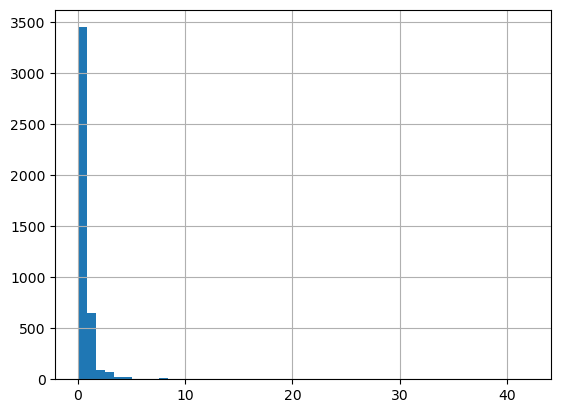

In [65]:
# Create a categorical field for days_to_init_treatment
df['days_to_init_treatment'].hist(bins = 50)

In [66]:
# Define cutoffs and categories
bins = [-0.1, 0, 3, 7, df['days_to_init_treatment'].max()]
labels = ["Same day", "1-3 days", "4-7 days", "More than 7 days"]

# Assign categories
df['cat_days_to_init_treatment'] = pd.cut(df['days_to_init_treatment'], bins = bins, labels = labels)

# Convert to categorical and add "Unknown" category
df['cat_days_to_init_treatment'] = df['cat_days_to_init_treatment'].astype("category")
df['cat_days_to_init_treatment'] = df['cat_days_to_init_treatment'].cat.add_categories("Unknown")

# Identify cases where all days_to_* are NaN but at least one treatment flag is 1
mask = df['days_to_init_treatment'].isna() & (df[['ac_flag', 'lytics_flag', 'mt_flag', 'us_cdt_flag']].sum(axis=1) > 0)

# Assign "Unknown" to those cases
df.loc[mask, 'cat_days_to_init_treatment'] = "Unknown"

# Add "No Treatment" as a category and fill remaining NaNs
df['cat_days_to_init_treatment'] = df['cat_days_to_init_treatment'].cat.add_categories("No Treatment")
df['cat_days_to_init_treatment'].fillna("No Treatment", inplace = True)

# Check distribution
print(df['cat_days_to_init_treatment'].value_counts())

Same day            3451
1-3 days             806
No Treatment         334
4-7 days              56
Unknown               46
More than 7 days      30
Name: cat_days_to_init_treatment, dtype: int64


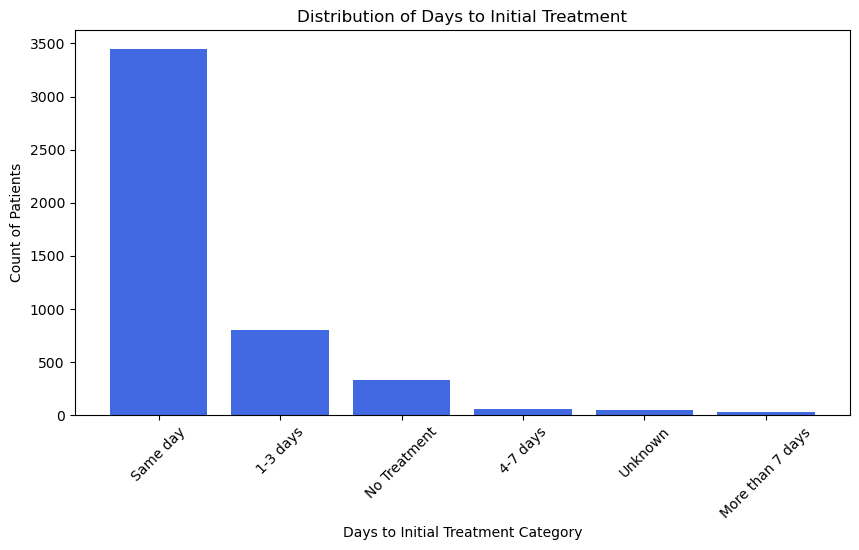

In [67]:
category_counts = df['cat_days_to_init_treatment'].value_counts()

# Plot bar chart
plt.figure(figsize = (10, 5))
plt.bar(category_counts.index, category_counts.values, color='royalblue')

# Customize labels and title
plt.xlabel("Days to Initial Treatment Category")
plt.ylabel("Count of Patients")
plt.title("Distribution of Days to Initial Treatment")
plt.xticks(rotation = 45)  # Rotate x-axis labels for readability

# Show plot
plt.show()

In [68]:
# Drop treatment columns no longer needed
df = df.drop(columns = ['days_to_ac', 'days_to_lytics', 'days_to_mt', 'days_to_cdt', 'days_to_init_treatment'], axis = 1)

In [69]:
# Add category "Unknown" for demographic/admission fields with missing values
df['discharge_location'].fillna('Unknown', inplace = True)
df['insurance'].fillna('Unknown', inplace = True)
df['marital_status'].fillna('Unknown', inplace = True)

# Add category "No PE" for pe_icd_code, pe_icd_version, and pe_diagnosis
df['pe_icd_code'].fillna('No PE', inplace = True)
df['pe_icd_version'].fillna('No PE', inplace = True)
df['pe_diagnosis'].fillna('No PE', inplace = True)

In [70]:
df.isna().sum()

subject_id                        0
hadm_id                           0
dvt_date                          0
pe_date                        4506
days_to_pe                     4506
dischtime                         0
admission_type                    0
admission_location                0
discharge_location                0
insurance                         0
marital_status                    0
race                              0
hospital_expire_flag              0
gender                            0
anchor_age                        0
dvt_icd_code                      0
dvt_icd_version                   0
dvt_diagnosis                     0
dvt_chronicity                    0
dvt_location                      0
pe_icd_code                       0
pe_icd_version                    0
pe_diagnosis                      0
length_of_stay                    0
num_dvt_admissions                0
num_dvt_diagnoses                 0
had_dvt_as_pri_diagnosis          0
had_icu_stay                

<AxesSubplot:>

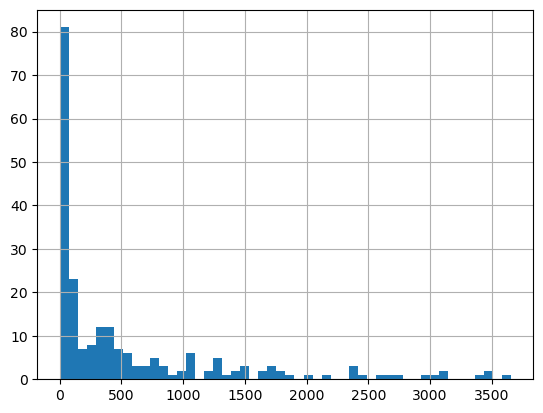

In [71]:
# Make days_to_pe a categorical column
df['days_to_pe'].hist(bins = 50)

In [72]:
# Define categorical bins for days_to_pe
bins = [0, 30, 90, 180, 365, df['days_to_pe'].max()]
labels = ["Within 1 month", "1-3 months", 
          "3-6 months", "6-12 months", "More than 1 year"]

# Apply binning
df["cat_days_to_pe"] = pd.cut(df["days_to_pe"], bins = bins, labels = labels, right = False)

# Fill null values with "No PE"
df['cat_days_to_pe'] = df['cat_days_to_pe'].cat.add_categories('No PE').fillna('No PE')

# Check distribution
print(df["cat_days_to_pe"].value_counts())

No PE               4507
More than 1 year      87
Within 1 month        58
1-3 months            30
6-12 months           21
3-6 months            20
Name: cat_days_to_pe, dtype: int64


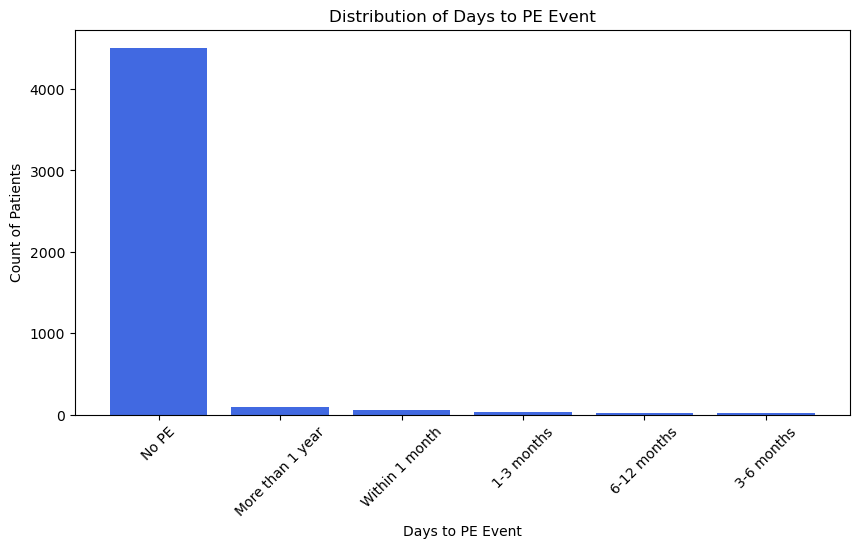

In [73]:
category_counts = df['cat_days_to_pe'].value_counts()

# Plot bar chart
plt.figure(figsize = (10, 5))
plt.bar(category_counts.index, category_counts.values, color = 'royalblue')

# Customize labels and title
plt.xlabel("Days to PE Event")
plt.ylabel("Count of Patients")
plt.title("Distribution of Days to PE Event")
plt.xticks(rotation = 45)  # Rotate x-axis labels for readability

# Show plot
plt.show()

There are 313 patients who expired during their initial DVT diagnosis admission. These patients could not have developed PE after discharge, making them irrelevant for longitudinal PE risk analysis. Thus, these subjects will be dropped from the dataset but can be kept separately for exploratory data analysis.

In [74]:
expired = df[
    (((df['hospital_expire_flag'] == 1) | (df['discharge_location'] == 'DIED')) & (df['days_to_pe'].isna()))
]
expired.shape

(313, 61)

In [75]:
# Drop expired patients from dataframe
df = df[(df['hospital_expire_flag'] == 0)]
df = df[(df['discharge_location'] != 'DIED')]

# Verify that records have been dropped
df.shape

(4410, 61)

In [76]:
# Drop unnecessary columns
df = df.drop(columns = ['days_to_pe', 'dischtime', 'anchor_age', 'hospital_expire_flag'], axis = 1)

# Verify
df.head()

,subject_id,hadm_id,dvt_date,pe_date,admission_type,admission_location,discharge_location,insurance,marital_status,race,gender,dvt_icd_code,dvt_icd_version,dvt_diagnosis,dvt_chronicity,dvt_location,pe_icd_code,pe_icd_version,pe_diagnosis,length_of_stay,num_dvt_admissions,num_dvt_diagnoses,had_dvt_as_pri_diagnosis,had_icu_stay,hx_ac,hx_dvt,hx_pe,hx_vte,pe_outcome,age,myocardial_infarct,congestive_heart_failure,peripheral_vascular_disease,cerebrovascular_disease,dementia,chronic_pulmonary_disease,rheumatic_disease,peptic_ulcer_disease,mild_liver_disease,diabetes_without_cc,diabetes_with_cc,paraplegia,renal_disease,malignant_cancer,severe_liver_disease,metastatic_solid_tumor,aids,charlson_comorbidity_index,had_ddimer,had_o2_sat,ac_flag,lytics_flag,mt_flag,us_cdt_flag,num_pe_events,cat_days_to_init_treatment,cat_days_to_pe
0,10000980,25242409,2191-04-03T18:48:00,NaN,EW EMER.,EMERGENCY ROOM,SKILLED NURSING FACILITY,Medicare,MARRIED,BLACK/AFRICAN AMERICAN,F,45342,9,Acute venous embolism and thrombosis of deep vessels of distal lower extremity,Acute,Lower,No PE,No PE,No PE,8,1,1,1,1,1,1,0,1,0,78,1,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,10,0,0,1,0,0,0,0,Same day,No PE
1,10001401,26840593,2131-06-19T21:32:00,2131-07-30T21:40:00,OBSERVATION ADMIT,EMERGENCY ROOM,SKILLED NURSING FACILITY,Medicare,MARRIED,WHITE,F,I82412,10,Acute embolism and thrombosis of left femoral vein,Acute,Lower,I2699,10.00,Other pulmonary embolism without acute cor pulmonale,13,2,2,0,0,1,1,1,1,1,89,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,6,0,0,1,0,0,0,1,Same day,1-3 months
3,10001919,29897682,2124-04-20T00:00:00,NaN,SURGICAL SAME DAY ADMISSION,PHYSICIAN REFERRAL,HOME,Private,MARRIED,OTHER,M,I82621,10,Acute embolism and thrombosis of deep veins of right upper extremity,Acute,Upper,No PE,No PE,No PE,1,1,1,0,0,1,0,0,0,0,59,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,7,0,0,1,0,0,0,0,Same day,No PE
4,10002131,24065018,2128-03-17T14:53:00,NaN,EW EMER.,EMERGENCY ROOM,HOSPICE,Medicare,WIDOWED,WHITE,F,I82412,10,Acute embolism and thrombosis of left femoral vein,Acute,Lower,No PE,No PE,No PE,2,1,2,1,0,0,0,0,0,0,92,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,1,0,0,0,0,Same day,No PE
5,10002769,25681387,2174-07-06T18:37:00,NaN,EW EMER.,EMERGENCY ROOM,HOME HEALTH CARE,Private,SINGLE,BLACK/AFRICAN AMERICAN,F,45342,9,Acute venous embolism and thrombosis of deep vessels of distal lower extremity,Acute,Lower,No PE,No PE,No PE,2,1,1,1,0,1,1,0,1,0,59,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,Same day,No PE


### Export Data to CSV

In [77]:
df.to_csv('C://Users//alexm//OneDrive//Desktop//Northwestern//Winter 2025//MSDS 498//Capstone Project//PE_Predictions//Data//Preprocessed_Data//preprocessed.csv', header = True, index = False)
expired.to_csv('C://Users//alexm//OneDrive//Desktop//Northwestern//Winter 2025//MSDS 498//Capstone Project//PE_Predictions//Data//Preprocessed_Data//expired.csv', header = True, index = False)

c:\Users\alexm\anaconda3\lib\site-packages\pandas\core\internals\blocks.py:2201: RuntimeWarning: invalid value encountered in cast
  values = values.astype(str)
